In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
%matplotlib inline 

In [2]:
import os

DATASET = 'dataset/Edge-IIoTset-dataset'

for path, dirs, files in os.walk(DATASET):
    for file in files:
        if file.endswith('csv'):
            print(f'{path}/{file}')

dataset/Edge-IIoTset-dataset/Attack traffic/Backdoor_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_HTTP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/DDoS_UDP_Flood_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/MITM_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/OS_Fingerprinting_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Password_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Port_Scanning_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Ransomware_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/SQL_injection_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Uploading_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/Vulnerability_scanner_attack.csv
dataset/Edge-IIoTset-dataset/Attack traffic/XSS_attack.csv
dataset/Edge-IIoTset-dataset/Normal traffic/Dist

``` bash
#!/bin/bash

# Find all files with a ".csv" extension in the current directory and its subdirectories
find ./ -type f -name "*.csv" | while read file; do
    # Count the number of lines in each file
    lines=$(wc -l < "$file")
    # Print the file path and its line count
    echo "$file has $lines lines"
done
```

```
./Attack traffic/Backdoor_attack.csv has 24863 lines
./Attack traffic/DDoS_HTTP_Flood_attack.csv has 229023 lines
./Attack traffic/DDoS_ICMP_Flood_attack.csv has 2914355 lines
./Attack traffic/DDoS_TCP_SYN_Flood_attack.csv has 2020121 lines
./Attack traffic/DDoS_UDP_Flood_attack.csv has 3201627 lines
./Attack traffic/MITM_attack.csv has 1230 lines
./Attack traffic/OS_Fingerprinting_attack.csv has 1002 lines
./Attack traffic/Password_attack.csv has 1053386 lines
./Attack traffic/Port_Scanning_attack.csv has 22565 lines
./Attack traffic/Ransomware_attack.csv has 10926 lines
./Attack traffic/SQL_injection_attack.csv has 51204 lines
./Attack traffic/Uploading_attack.csv has 37635 lines
./Attack traffic/Vulnerability_scanner_attack.csv has 145870 lines
./Attack traffic/XSS_attack.csv has 15916 lines
./Normal traffic/Distance/Distance.csv has 1143541 lines
./Normal traffic/Flame_Sensor/Flame_Sensor.csv has 1070197 lines
./Normal traffic/Heart_Rate/Heart_Rate.csv has 165320 lines
./Normal traffic/IR_Receiver/IR_Receiver.csv has 1307779 lines
./Normal traffic/Modbus/Modbus.csv has 159503 lines
./Normal traffic/phValue/phValue.csv has 746909 lines
./Normal traffic/Soil_Moisture/Soil_Moisture.csv has 1192778 lines
./Normal traffic/Sound_Sensor/Sound_Sensor.csv has 1512884 lines
./Normal traffic/Temperature_and_Humidity/Temperature_and_Humidity.csv has 1615723 lines
./Normal traffic/Water_Level/Water_Level.csv has 2295289 lines
./Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv has 2219202 lines
./Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv has 157801 lines
```

In [13]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from '/mnt/d/stuff/univ/ids/ids_common.py'>

In [14]:
path_to_dataset = './dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'

df  = ids_common.prepare_dataset(path_to_dataset)
df.info()




drop: NA: 0, DUPS: 5604
drop: NA: 0, DUPS: 5604
dropna: NA: 0, DUPS: 5604
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
Attack_label
1    128095
0     24101
Name: count, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64
################################################################################
<class 'pandas.core.frame.DataFrame'>
In

In [15]:

for col in sorted(df.columns, key=lambda c: len(df[c].unique())):
    num_uniq = len(df[col].unique())
    if num_uniq < 10:
        print(f'-----------{num_uniq}------------')
        print('\t', df[col].dtype, df[col].value_counts().sort_index())


-----------2------------
	 float64 arp.hw.size
0.0    152177
6.0        19
Name: count, dtype: int64
-----------2------------
	 float64 http.response
0.0    144977
1.0      7219
Name: count, dtype: int64
-----------2------------
	 float64 tcp.connection.fin
0.0    143021
1.0      9175
Name: count, dtype: int64
-----------2------------
	 float64 tcp.connection.rst
0.0    137414
1.0     14782
Name: count, dtype: int64
-----------2------------
	 float64 tcp.connection.syn
0.0    132136
1.0     20060
Name: count, dtype: int64
-----------2------------
	 float64 tcp.connection.synack
0.0    147472
1.0      4724
Name: count, dtype: int64
-----------2------------
	 float64 tcp.flags.ack
0.0     52055
1.0    100141
Name: count, dtype: int64
-----------2------------
	 float64 dns.retransmit_request
0.0    152195
1.0         1
Name: count, dtype: int64
-----------2------------
	 float64 mqtt.conflag.cleansess
0.0    150946
1.0      1250
Name: count, dtype: int64
-----------2------------
	 float64

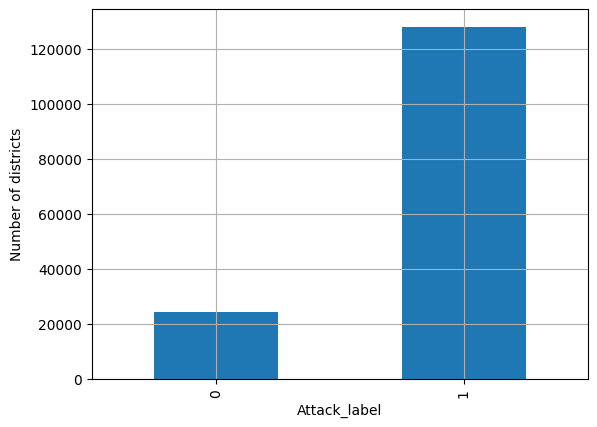

In [5]:
df["Attack_label"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Attack_label")
plt.ylabel("Number of districts")
plt.xticks(rotation=90)
# save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

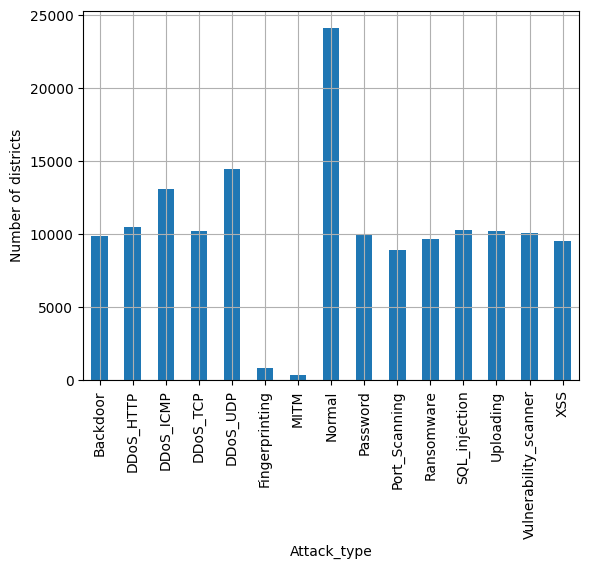

In [6]:
df["Attack_type"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Attack_type")
plt.ylabel("Number of districts")
plt.xticks(rotation=90)
# save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()
          

In [16]:
corr_matrix = df.corr(numeric_only=True)

In [18]:
corr_matrix["Attack_label"].sort_values(key=lambda x: abs(x), ascending=False)

Attack_label                                                                         1.000000
mqtt.hdrflags                                                                       -0.292882
mqtt.msgtype                                                                        -0.292882
mqtt.len                                                                            -0.273011
tcp.seq                                                                             -0.269861
mqtt.protoname-0                                                                     0.209794
mqtt.protoname-MQTT                                                                 -0.209794
mqtt.ver                                                                            -0.209794
mqtt.proto_len                                                                      -0.209794
mqtt.conflags                                                                       -0.209794
mqtt.conflag.cleansess                                      